In [0]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

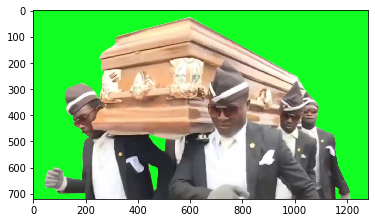

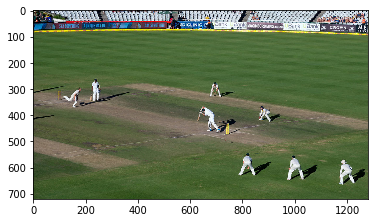

In [0]:
fg = cv.imread("images/chroma_key.jpg")
bg = cv.imread("images/stadium.jpg")

plt.imshow(fg[:,:,::-1])
plt.show()
plt.imshow(bg[:,:,::-1])

(720, 1280, 3)


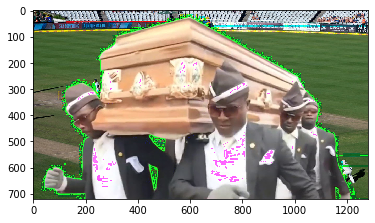

In [0]:
new_img = np.zeros((fg.shape))

masked = fg == fg[0][0]

print(masked.shape)

new_bg = bg.copy()
new_bg[~masked] = 0

new_fg = fg.copy()
new_fg[masked] = 0

plt.imshow((new_fg + new_bg)[:,:,::-1])

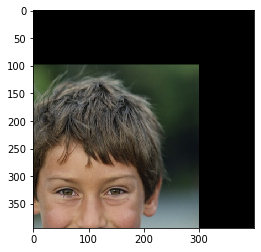

In [0]:
img = cv.imread("images/boy_smiling.jpg")
h, w = img.shape[:2]

M = np.float32([[1, 0, -w/4], [0, 1, h/4]])
translated = cv.warpAffine(img, M, (w, h))

plt.imshow(translated[:,:,::-1])

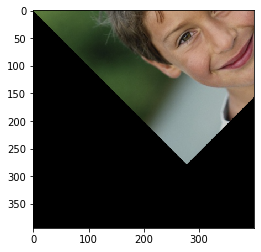

In [0]:
M1 = cv.getRotationMatrix2D((0, 0), 45, 1)
rotated = cv.warpAffine(img, M1, (w, h))

plt.imshow(rotated[:,:,::-1])

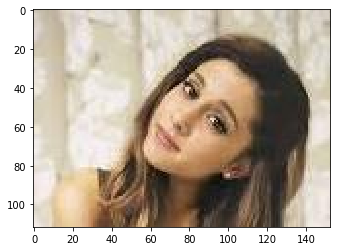

In [0]:
tilted_face = cv.imread("images/tilted_face.jpg")
h, w = tilted_face.shape[:2]

# %matplotlib qt
%matplotlib inline
plt.imshow(tilted_face[:,:,::-1])

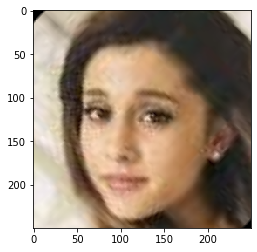

In [0]:
left_eye = np.array([81, 42])
right_eye = np.array([96, 58])
nose = (75, h-55)

def angle(a, b):
    d = np.dot(a, b)
    d /= np.linalg.norm(a)
    d /= np.linalg.norm(b)

    return np.rad2deg(np.arccos(d))

eye_line = right_eye - left_eye
eye_hori = np.array([right_eye[0], left_eye[1]]) - left_eye
scale = 3

M = cv.getRotationMatrix2D(nose, angle(eye_line, eye_hori), scale)

# translate a little
M[0][-1] += 1.3*w
M[1][-1] += h

straight = cv.warpAffine(tilted_face, M, (w, h))

plt.imshow(straight[:,:,::-1])

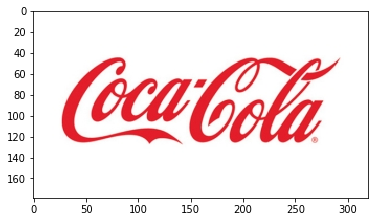

In [0]:
cola = cv.imread("images/coca.jpg")

ch, cw = cola.shape[:2]

plt.imshow(cola[:,:,::-1])

In [0]:
stadium = cv.imread("images/stadium.jpg")

sh, sw = stadium.shape[:2]

%matplotlib qt
plt.imshow(stadium[:,:,::-1])
%matplotlib inline

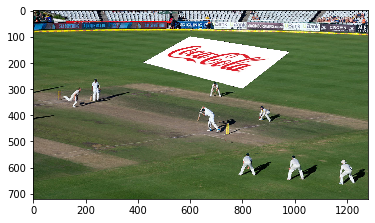

In [0]:
p1 = np.float32([[0,0],[0,179],[320, 0],[320,179]])
p2 = 2*np.float32([[100,0],[10, 50],[290, 30],[200, 100]])

M = cv.getPerspectiveTransform(p1, p2)
img = cv.warpPerspective(cola, M, (2*cw, 2*ch))

h, w = img.shape[:2]
px = 100
py = 400

merged = stadium.copy()
patch = merged[px:px+h, py:py+w]
patch[img != 0] = 0
patch += img
merged[px:px+h, py:py+w] = patch

plt.imshow(merged[:,:,::-1])

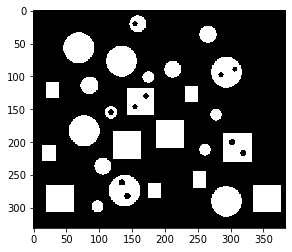

In [0]:
img = cv.imread("images/objects.png")

plt.imshow(img, cmap="gray")

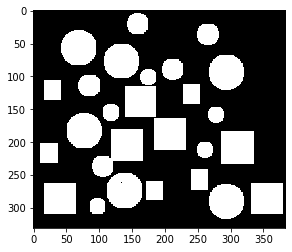

In [0]:
dilated = cv.dilate(img, np.ones((3, 3)), iterations=3)

plt.imshow(dilated, cmap="gray")

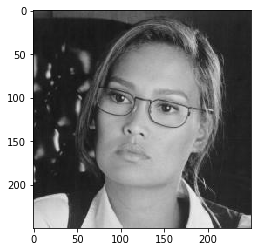

In [0]:
# %matplotlib qt
# %matplotlib inline
face = cv.imread("images/face.jpg")
plt.imshow(face)
h, w = face.shape[:2]

[ 52 -11]


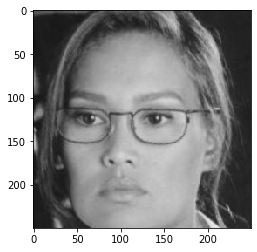

In [0]:
left_eye = np.array([100, h-100])
right_eye = np.array([152, h-111])
nose = (115, h-133)

def angle(a, b):
    d = np.dot(a, b)
    d /= np.linalg.norm(a)
    d /= np.linalg.norm(b)

    return np.rad2deg(np.arccos(d))

eye_line = right_eye - left_eye
print(eye_line)
eye_hori = np.array([right_eye[0], left_eye[1]]) - left_eye
scale = 1.4

M = cv.getRotationMatrix2D(nose, angle(eye_line, eye_hori), scale)

# translate a little
M[0][-1] -= w/10
M[1][-1] += h/10

straight = cv.warpAffine(face, M, (w, h))

plt.imshow(straight[:,:,::-1])

((197, 255, 3), <matplotlib.image.AxesImage at 0x7f1834ace910>)

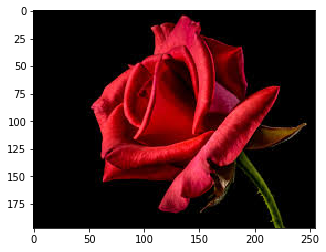

In [0]:
rose = cv.imread("images/rose.jpeg")
rh, rw = rose.shape[:2]

rose.shape,plt.imshow(rose[:,:,::-1])

((750, 500, 3), <matplotlib.image.AxesImage at 0x7f1837256d60>)

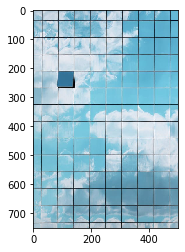

In [0]:
bg = cv.imread("images/window.jpeg")

bg.shape, plt.imshow(bg[:,:,::-1])

(197, 255, 3)


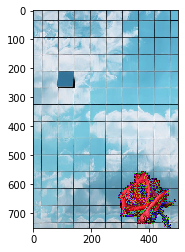

In [0]:
patched = bg[-rh:, -rw:]
print(patched.shape)
patched[rose != 0] = 0
patched += rose
bg[-rh:, -rw:] = patched

plt.imshow(bg[:,:,::-1])

In [0]:
class DSU:
    def __init__(self, n):
        self.rank = np.array([1] * n)
        self.parent = np.array(list(range(n)))

    def find(self, i):
        if self.parent[i] != i:
            self.parent[i] = self.find(self.parent[i])
        return self.parent[i]

    def union(self, i, j):
        x = self.find(i)
        y = self.find(j)

        if x == y:
            return

        if self.rank[x] < self.rank[y]:
            self.parent[x] = y
        elif self.rank[x] > self.rank[y]:
            self.parent[y] = x
        else:
            self.parent[y] = x
            self.rank[x] += 1

In [0]:
def count(img, col):
    id = 1
    labels = np.zeros(img.shape[:2]).astype("uint")
    nx, ny = img.shape[:2]

    for i in range(nx):
        for j in range(ny):
            if (img[i, j] == col).all():
                if i > 0 and labels[i-1, j] != 0:
                    labels[i, j] = labels[i-1, j]
                elif j < ny - 1 and labels[i, j+1] != 0:
                    labels[i, j] = labels[i, j+1]
                elif i < nx - 1 and labels[i+1, j] != 0:
                    labels[i, j] = labels[i+1, j]
                elif j > 0 and labels[i, j-1] != 0:
                    labels[i, j] = labels[i, j-1]
                else:
                    labels[i, j] = id
                    id += 1

    dsu = DSU(id+1)
    
    for i in range(nx):
        for j in range(ny):
            if labels[i, j] != 0:
                if i > 0 and labels[i-1, j] != labels[i,j] and labels[i-1,j] != 0:
                    dsu.union(*sorted([labels[i,j], labels[i-1, j]]))
                elif j < ny - 1 and labels[i, j+1] != labels[i,j] and labels[i,j+1] != 0:
                    dsu.union(*sorted([labels[i,j], labels[i, j+1]]))
                elif i < nx - 1 and labels[i+1, j] != labels[i,j] and labels[i+1,j] != 0:
                    dsu.union(*sorted([labels[i,j], labels[i+1, j]]))
                elif j > 0 and labels[i, j-1] != labels[i, j] and labels[i, j-1] != 0:
                    dsu.union(*sorted([labels[i,j], labels[i, j-1]]))

    parents = []
    for i in range(1,id+1):
        parents.append(dsu.find(i))

    return len(np.unique(parents))

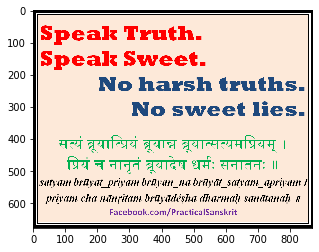

In [0]:
img = cv.imread("images/text2.png")

plt.imshow(img[:,:,::-1])

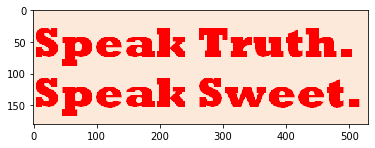

In [0]:
c1 = img[20:200, 20:550]

plt.imshow(c1[:,:,::-1])

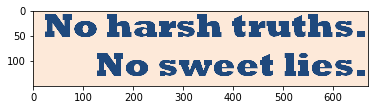

In [0]:
c2 = img[200:350, 180:850]

plt.imshow(c2[:,:,::-1])

In [0]:
print(count(c1, [0, 0, 255]))
print(count(c2, [125, 73, 31]))

25
28
